In [2]:
import pandas as pd
import numpy as np
import geopandas as gpd
from pyproj import CRS
import fiona;fiona.supported_drivers
from shapely.geometry import Polygon, LineString, Point

In [3]:
path = 'G:\我的云端硬盘\PC5287_M.SC Coursework Thesis for Physics And Technology\data set'

In [4]:
gpd.io.file.fiona.drvsupport.supported_drivers['KML'] = 'rw' 
#read KML file
#https://docs.astraea.earth/hc/en-us/articles/360043923831-Read-a-KML-File-into-a-GeoPandas-DataFrame
pa = gpd.read_file(path + '\master-plan-2019-planning-area-boundary-no-sea\planning-boundary-area.kml', driver='KML')

In [4]:
pa = pa.to_crs(3414)

In [5]:
#pa.Description[0]
# pa.Description[0].split('PLN_AREA_N')[1] 
#取分割后序列为1的项

In [5]:
def extract_desc_pa(desc_pa):
    return desc_pa.split('PLN_AREA_N')[1].split('<td>')[1].split('<')[0]
pa['PLN_AREA_N'] = pa.Description.apply(extract_desc_pa)

<AxesSubplot:>

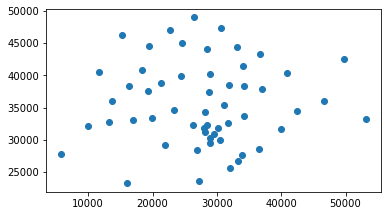

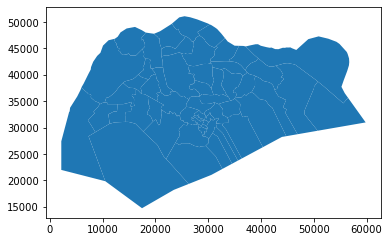

In [7]:
pa['centroid'] = pa.centroid
pa['centroid'].plot()
pa.plot()

In [8]:
pa

,Name,Description,geometry,PLN_AREA_N,centroid
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((26228.902 30746.172 0.000, 26280.4...",BUKIT MERAH,POINT (26912.598 28387.822)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((21448.724 41356.741 0.000, 21508.5...",BUKIT PANJANG,POINT (21287.044 38761.845)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24031.387 36694.742 0.000, 24076.6...",BUKIT TIMAH,POINT (23256.937 34689.842)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((24934.967 44017.724 0.000, 24953.6...",CENTRAL WATER CATCHMENT,POINT (24425.213 39848.609)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((45094.369 42203.459 0.000, 45174.6...",CHANGI,POINT (46724.354 35986.766)
5,kml_6,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((18349.061 43028.676 0.000, 18383.8...",CHOA CHU KANG,POINT (18415.053 40833.423)
6,kml_7,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((20627.133 34823.182 0.000, 20628.0...",CLEMENTI,POINT (19923.845 33317.612)
7,kml_8,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((33363.801 41074.684 0.000, 33494.8...",HOUGANG,POINT (34285.759 38409.707)
8,kml_9,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((18003.863 36295.207 0.000, 18060.7...",JURONG EAST,POINT (17024.585 33006.775)
9,kml_10,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((16293.567 36778.095 0.000, 16297.1...",JURONG WEST,POINT (13708.654 35974.528)


In [9]:
sz = gpd.read_file(path+"\master-plan-2019-subzone-boundary-no-sea\master-plan-2019-subzone-boundary-no-sea-geojson.geojson")  
#sz for subzones
#read geojson file 
sz = sz.to_crs(3414)

In [10]:
# sz['Description'][1]

In [11]:
def extract_desc_sz(desc_sz):
    return desc_sz.split('SUBZONE_N')[2].split('<td>')[1].split('<')[0]
sz['SUBZONE_N']=sz.Description.apply(extract_desc_sz)
sz['PLN_AREA_N'] = sz.Description.apply(extract_desc_pa)
sz.head()

,Name,Description,geometry,SUBZONE_N,PLN_AREA_N
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((33222.981 29588.127 0.000, 33222.5...",MARINA EAST,MARINA EAST
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28481.446 30886.220 0.000, 28483.4...",INSTITUTION HILL,RIVER VALLEY
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28087.344 30540.999 0.000, 28087.5...",ROBERTSON QUAY,SINGAPORE RIVER
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"MULTIPOLYGON Z (((14557.697 30447.212 0.000, 1...",JURONG ISLAND AND BUKOM,WESTERN ISLANDS
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29542.526 31041.199 0.000, 29553.7...",FORT CANNING,MUSEUM


<AxesSubplot:>

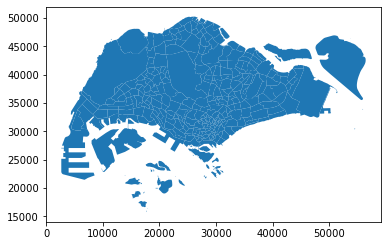

In [12]:
sz.plot()

<AxesSubplot:>

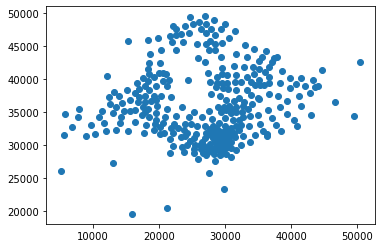

In [13]:
sz['centroid'] = sz.centroid 
#get the geometrical centrioids
sz['centroid'].plot()

In [14]:
sz.head()

,Name,Description,geometry,SUBZONE_N,PLN_AREA_N,centroid
0,kml_1,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((33222.981 29588.127 0.000, 33222.5...",MARINA EAST,MARINA EAST,POINT (32344.044 30103.258)
1,kml_2,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28481.446 30886.220 0.000, 28483.4...",INSTITUTION HILL,RIVER VALLEY,POINT (28465.400 30711.218)
2,kml_3,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((28087.344 30540.999 0.000, 28087.5...",ROBERTSON QUAY,SINGAPORE RIVER,POINT (28416.848 30409.361)
3,kml_4,<center><table><tr><th colspan='2' align='cent...,"MULTIPOLYGON Z (((14557.697 30447.212 0.000, 1...",JURONG ISLAND AND BUKOM,WESTERN ISLANDS,POINT (13011.100 27230.330)
4,kml_5,<center><table><tr><th colspan='2' align='cent...,"POLYGON Z ((29542.526 31041.199 0.000, 29553.7...",FORT CANNING,MUSEUM,POINT (29417.225 30714.598)


In [ ]:
centroid_pa = gpd.GeoDataFrame()
centroid_pa['PLN_AREA_N'] = pa['PLN_AREA_N']
centroid_pa['geometry'] = pa['centroid']
centroid_pa = centroid_pa.to_crs(3414)
# creat the centroids list 

dist_pa = pd.DataFrame()
dist_pa['PA_name'] = centroid_pa['PLN_AREA_N']

In [ ]:
for i in range(0,55):
    name = centroid_pa.iloc[i]['PLN_AREA_N']
    dist_pa[name] = centroid_pa['geometry'].distance(centroid_pa.iloc[i]['geometry'])

In [23]:
dist_pa = dist_pa.drop(columns='Unnamed: 0')

In [24]:
dist_pa

,PA_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,BUKIT MERAH,0.000000,11801.153055,7285.555760,11727.605889,21219.086601,15069.878839,8552.513484,12441.932351,10913.639880,...,2728.259723,5800.375314,26663.970694,9595.800021,9052.865975,13940.794275,12085.688405,19498.609475,19189.279821,15778.005629
1,BUKIT PANJANG,11801.153055,0.000000,4523.459054,3321.018256,25588.235593,3541.153151,5612.306333,13003.483794,7161.660539,...,11382.891056,16994.785211,32314.728877,18303.253061,13926.812556,15799.844748,16434.287300,9741.338977,8486.111357,8907.549437
2,BUKIT TIMAH,7285.555760,4523.459054,0.000000,5289.399414,23503.226876,7822.238515,3604.512914,11639.256997,6455.612039,...,7144.707832,12631.143946,29906.421553,14584.338004,11043.957271,14186.186644,13589.709392,12966.105831,12440.999877,10729.064832
3,CENTRAL WATER CATCHMENT,11727.605889,3321.018256,5289.399414,0.000000,22631.074216,6090.310227,7931.975597,9964.978992,10078.689893,...,10554.169342,16172.672171,29451.542056,16511.149567,11603.113070,12783.470977,18658.600711,12724.814637,7462.027830,5830.855805
4,CHANGI,21219.086601,25588.235593,23503.226876,22631.074216,0.000000,28721.187147,26933.095315,12672.382869,29848.896622,...,18736.425191,18079.710186,6963.328168,12612.107756,12680.341719,9854.516628,33281.851530,35305.476672,26431.880659,20016.590581
5,CHOA CHU KANG,15069.878839,3541.153151,7822.238515,6090.310227,28721.187147,0.000000,7665.759339,16054.709594,7949.201684,...,14861.216911,20432.304444,35531.702258,21842.495828,17378.827264,18873.452155,17795.965181,6695.187847,7637.796731,10525.326271
6,CLEMENTI,8552.513484,5612.306333,3604.512914,7931.975597,26933.095315,7665.759339,0.000000,15237.912494,2915.876061,...,9455.620533,14335.079601,33205.065530,17242.020949,14335.773634,17754.262382,10850.901590,10976.676667,14089.693860,13724.053165
7,HOUGANG,12441.932351,13003.483794,11639.256997,9964.978992,12672.382869,16054.709594,15237.912494,0.000000,18087.006227,...,9764.025224,13074.963742,19535.809090,10063.800977,4726.302388,2819.030407,23786.112430,22669.752026,14453.758890,8165.684903
8,JURONG EAST,10913.639880,7161.660539,6455.612039,10078.689893,29848.896622,7949.201684,2915.876061,18087.006227,0.000000,...,12163.252093,16703.135832,36105.108163,19975.136500,17243.648729,20639.451542,9857.936895,9272.310087,15231.572635,15900.703937
9,JURONG WEST,15228.336785,8074.721069,9634.319694,11395.311798,33015.701761,6764.542902,6759.275772,20720.697846,4450.050813,...,16203.240234,21028.552713,39513.990047,23962.488549,20673.631073,23439.532405,12975.010724,5046.591189,14353.166329,16805.419367


In [ ]:
centroid_sz = gpd.GeoDataFrame()
centroid_sz['SUBZONE_N'] = sz['SUBZONE_N']
centroid_sz['geometry'] = sz['centroid']
centroid_sz = centroid_sz.to_crs(3414)

dist_pa_sz = pd.DataFrame()
dist_pa_sz['SZ_name'] = sz['SUBZONE_N']

In [21]:
for i in range(0,55):
    name = centroid_pa.iloc[i]['PLN_AREA_N']
    dist_pa_sz[name] = centroid_sz['geometry'].distance(centroid_pa.iloc[i]['geometry'])
dist_pa_sz

,SZ_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,JURONG EAST,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,MARINA EAST,5695.905074,14043.802234,10179.011630,12557.060209,15537.341037,17582.753627,12829.396088,8530.377413,15592.185686,...,3470.325075,4576.809763,21022.192333,4427.361782,4058.290447,9150.020327,17745.016405,23144.973913,19534.588708,14529.272507
1,INSTITUTION HILL,2794.524110,10786.166765,6554.200461,9990.747613,19005.809657,14264.238676,8930.366291,9651.077848,11668.840614,...,597.075437,6243.476037,24794.137877,8314.877670,6507.946450,11235.319262,14555.789868,19451.553132,17375.623784,13382.235271
2,ROBERTSON QUAY,2519.799212,10981.716533,6704.267807,10248.539813,19138.239928,14446.347904,8977.138273,9922.179751,11684.614799,...,479.201426,6024.429865,24875.138866,8290.549722,6693.537631,11468.466047,14360.383579,19565.512584,17645.326139,13684.026030
3,JURONG ISLAND AND BUKOM,13949.602912,14193.909775,12673.653436,17014.785967,34831.862473,14637.172866,9210.920057,24033.092924,7033.873635,...,16157.501911,19030.814366,40567.390740,23534.620036,22202.355304,26331.258044,5012.980996,13445.723130,22147.320432,22844.765951
4,FORT CANNING,3418.632244,11439.320060,7331.557097,10409.148077,18092.331276,14947.856711,9843.776979,9105.894724,12602.841984,...,692.490219,5766.829845,23847.169108,7399.367501,5676.088359,10522.253883,15380.691288,20274.929974,17708.304011,13415.693475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,UPPER THOMSON,9410.434164,6677.184105,5548.492347,4049.217266,18919.717443,9961.676037,9112.283476,6433.148789,11851.719586,...,7533.379335,12869.576388,25639.035328,12573.233096,7554.565395,9180.824086,18787.082014,16415.533133,10687.312566,6368.288523
328,SHANGRI-LA,10630.274456,7278.774756,6767.922727,4249.284018,18390.085595,10334.242711,10281.249937,5741.085590,12952.768260,...,8614.791295,13773.701430,25202.267644,13002.091682,7712.021723,8553.530911,20100.694692,16929.401698,10077.193343,5206.390125
329,TOWNSVILLE,10581.720076,8400.982630,7524.906064,5407.490858,17237.062112,11490.646161,11099.865054,4603.215497,13842.025414,...,8358.829303,13255.126087,24044.225594,12108.697735,6711.049412,7408.417784,20603.363002,18075.639435,10986.263220,5637.332922
330,MARYMOUNT,9304.173587,8118.364488,6604.999686,5451.436334,17492.636446,11406.672890,10208.493823,5102.375450,13020.728761,...,7115.709529,12141.074087,24196.367196,11374.077988,6194.078079,7797.896617,19436.488604,17858.750125,11726.972570,6765.117289


In [25]:
dist_pa.to_csv(path +'\distance_pa_to_pa.csv')
dist_pa_sz.to_csv(path +'\dist_pa_to_sz.csv')
centroid_pa.to_csv(path +'\centroid_pa.csv')
centroid_sz.to_csv(path +'\centroid_sz.csv')

In [26]:
dist_pa=pd.read_csv(path +'\distance_pa_to_pa.csv')

In [27]:
dist_pa

,Unnamed: 0,PA_name,BUKIT MERAH,BUKIT PANJANG,BUKIT TIMAH,CENTRAL WATER CATCHMENT,CHANGI,CHOA CHU KANG,CLEMENTI,HOUGANG,...,SINGAPORE RIVER,STRAITS VIEW,CHANGI BAY,MARINE PARADE,GEYLANG,PAYA LEBAR,WESTERN ISLANDS,WESTERN WATER CATCHMENT,WOODLANDS,YISHUN
0,0,BUKIT MERAH,0.000000,11801.153055,7285.555760,11727.605889,21219.086601,15069.878839,8552.513484,12441.932351,...,2728.259723,5800.375314,26663.970694,9595.800021,9052.865975,13940.794275,12085.688405,19498.609475,19189.279821,15778.005629
1,1,BUKIT PANJANG,11801.153055,0.000000,4523.459054,3321.018256,25588.235593,3541.153151,5612.306333,13003.483794,...,11382.891056,16994.785211,32314.728877,18303.253061,13926.812556,15799.844748,16434.287300,9741.338977,8486.111357,8907.549437
2,2,BUKIT TIMAH,7285.555760,4523.459054,0.000000,5289.399414,23503.226876,7822.238515,3604.512914,11639.256997,...,7144.707832,12631.143946,29906.421553,14584.338004,11043.957271,14186.186644,13589.709392,12966.105831,12440.999877,10729.064832
3,3,CENTRAL WATER CATCHMENT,11727.605889,3321.018256,5289.399414,0.000000,22631.074216,6090.310227,7931.975597,9964.978992,...,10554.169342,16172.672171,29451.542056,16511.149567,11603.113070,12783.470977,18658.600711,12724.814637,7462.027830,5830.855805
4,4,CHANGI,21219.086601,25588.235593,23503.226876,22631.074216,0.000000,28721.187147,26933.095315,12672.382869,...,18736.425191,18079.710186,6963.328168,12612.107756,12680.341719,9854.516628,33281.851530,35305.476672,26431.880659,20016.590581
5,5,CHOA CHU KANG,15069.878839,3541.153151,7822.238515,6090.310227,28721.187147,0.000000,7665.759339,16054.709594,...,14861.216911,20432.304444,35531.702258,21842.495828,17378.827264,18873.452155,17795.965181,6695.187847,7637.796731,10525.326271
6,6,CLEMENTI,8552.513484,5612.306333,3604.512914,7931.975597,26933.095315,7665.759339,0.000000,15237.912494,...,9455.620533,14335.079601,33205.065530,17242.020949,14335.773634,17754.262382,10850.901590,10976.676667,14089.693860,13724.053165
7,7,HOUGANG,12441.932351,13003.483794,11639.256997,9964.978992,12672.382869,16054.709594,15237.912494,0.000000,...,9764.025224,13074.963742,19535.809090,10063.800977,4726.302388,2819.030407,23786.112430,22669.752026,14453.758890,8165.684903
8,8,JURONG EAST,10913.639880,7161.660539,6455.612039,10078.689893,29848.896622,7949.201684,2915.876061,18087.006227,...,12163.252093,16703.135832,36105.108163,19975.136500,17243.648729,20639.451542,9857.936895,9272.310087,15231.572635,15900.703937
9,9,JURONG WEST,15228.336785,8074.721069,9634.319694,11395.311798,33015.701761,6764.542902,6759.275772,20720.697846,...,16203.240234,21028.552713,39513.990047,23962.488549,20673.631073,23439.532405,12975.010724,5046.591189,14353.166329,16805.419367
